In [1]:
import numpy as np 
from math import log
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline


def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))


X = np.array([[0.40, 0.53],
              [0.22, 0.38],
              [0.35, 0.32],
              [0.26, 0.19],
              [0.08, 0.41],
              [0.45, 0.30]])
print(X[0])
df = pd.DataFrame(X, columns=['x', 'y'])
df

[0.4  0.53]


,x,y
0,0.40,0.53
1,0.22,0.38
2,0.35,0.32
3,0.26,0.19
4,0.08,0.41
5,0.45,0.30


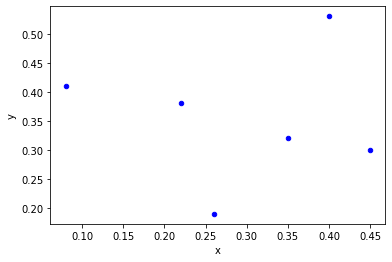

In [2]:
ax = df.plot.scatter(x='x', y='y', c='blue')

In [5]:
data = [[0.40, 0.53],
        [0.22, 0.38],
        [0.35, 0.32],
        [0.26, 0.19],
        [0.08, 0.41],
        [0.45, 0.30]]
name = ['P1', 'P2','P3','P4','P5','P6']
df = pd.DataFrame(data, columns=['x', 'y'], index=name)

n_df=(df.values)
n_df
n_df[0]
df

,x,y
P1,0.40,0.53
P2,0.22,0.38
P3,0.35,0.32
P4,0.26,0.19
P5,0.08,0.41
P6,0.45,0.30


In [4]:
(df.values).shape

(6, 2)

In [7]:
matrix=np.zeros(((df.values).shape[0],(df.values).shape[0]))
matrix

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [8]:
#distance matrix
for i in range((df.values).shape[0]):
    for j in range((df.values).shape[0]):
        matrix[i,j]=np.round(np.sqrt(np.sum((n_df[i]-n_df[j])**2)),2)
        #print('i',i,'j',j)


print(matrix)

[[0.   0.23 0.22 0.37 0.34 0.24]
 [0.23 0.   0.14 0.19 0.14 0.24]
 [0.22 0.14 0.   0.16 0.28 0.1 ]
 [0.37 0.19 0.16 0.   0.28 0.22]
 [0.34 0.14 0.28 0.28 0.   0.39]
 [0.24 0.24 0.1  0.22 0.39 0.  ]]


In [9]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs

centers = np.array([
    [0., 0., 0.],
    [10., 10., 10.],
    [20., 20., 20.],
])

#when you set centers as array, n_features is ignored 
X, true_labels = make_blobs(n_samples=10,centers=centers,
                            cluster_std=1.0, random_state=42)

#cluster_std: The standard deviation of the clusters.
#x,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50) 

X[:10]

array([[19.45561728, 20.11092259, 18.84900642],
       [ 9.43771247,  8.98716888, 10.31424733],
       [ 1.52302986, -0.23415337, -0.23413696],
       [19.7742237 , 20.0675282 , 18.57525181],
       [ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.57921282,  0.76743473, -0.46947439],
       [10.24196227,  8.08671976,  8.27508217],
       [20.37569802, 19.39936131, 19.70830625],
       [ 9.09197592,  8.5876963 , 11.46564877],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [10]:
D = pairwise_distances(X)  # Distance matrix
D.shape

(10, 10)

In [11]:
np.max(D)

34.5669651593156

In [12]:
D

array([[ 0.        , 17.2319014 , 33.16121483,  0.42229695, 33.17766644,
        32.66404843, 18.47378593,  1.4461204 , 17.16693847, 33.97155053],
       [17.2319014 ,  0.        , 16.09171825, 17.25867962, 16.02052872,
        15.671908  ,  2.36977234, 17.78487059,  1.26682176, 16.87143234],
       [33.16121483, 16.09171825,  0.        , 33.1520355 ,  1.3565157 ,
         1.03039748, 14.75342408, 33.74313318, 16.49239104,  1.03320782],
       [ 0.42229695, 17.25867962, 33.1520355 ,  0.        , 33.1857492 ,
        32.65353925, 18.45256822,  1.4463854 , 17.21753216, 33.96962769],
       [33.17766644, 16.02052872,  1.3565157 , 33.1857492 ,  0.        ,
         1.80004086, 14.85925157, 33.76684708, 16.34163936,  1.16083025],
       [32.66404843, 15.671908  ,  1.03039748, 32.65353925,  1.80004086,
         0.        , 14.32069938, 33.28061561, 16.12591905,  1.60924227],
       [18.47378593,  2.36977234, 14.75342408, 18.45256822, 14.85925157,
        14.32069938,  0.        , 19.01018338